In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

* States: NJ, DC, NY, CN, KY, NE, ID, NM, MT, HI

In [2]:
# load in obesity
obese_data = pd.read_csv('Clean_2011_2016/obesity_over_65.csv')
costs_per_cap = pd.read_csv('Clean_2011_2016/medicare_costpercapita_2011_2016.csv')

In [3]:
obese_data_df = pd.DataFrame(obese_data)
costs_df = pd.DataFrame(costs_per_cap)

In [4]:
costs_df.rename(columns={"Cost per Capita":"State"},inplace=True)
costs_df.set_index('State',inplace=True)
costs_df.head()

,2011,2012,2013,2014,2015,2016
State,,,,,,
AK,8367.24,8171.94,8438.93,8643.21,8818.08,9255.28
AL,8687.16,8697.49,8584.16,8677.32,8942.93,9047.82
AR,8069.73,8131.90,8114.43,8300.60,8537.12,8693.43
AZ,8987.55,8987.89,8950.73,8911.07,9078.82,9222.18
CA,10728.40,10729.40,10814.94,10821.82,11155.99,11517.22


In [5]:
# Eastern-most states:
eastern_states_cost = pd.DataFrame(costs_df.loc['NJ'])
eastern_states_cost['DC'] = costs_df.loc['DC']
eastern_states_cost['NY']= costs_df.loc['NY']
eastern_states_cost['CT'] = costs_df.loc['CT']
eastern_states_cost['KY'] = costs_df.loc['KY']

# Western-most states
western_states_cost = pd.DataFrame(costs_df.loc['NE'])
western_states_cost['ID'] = costs_df.loc['ID']
western_states_cost['NM']= costs_df.loc['NM']
western_states_cost['MT'] = costs_df.loc['MT']
western_states_cost['HI'] = costs_df.loc['HI']
#western_states_cost.head()
eastern_states_cost.head()

,NJ,DC,NY,CT,KY
2011,11427.77,11824.84,11176.05,10911.93,8926.59
2012,11286.61,12009.94,11087.08,10872.84,8916.76
2013,11247.35,11729.49,11095.27,11150.62,8929.28
2014,11476.91,11639.70,11245.99,11315.89,8914.39
2015,11707.10,11717.40,11489.62,11531.02,9127.09


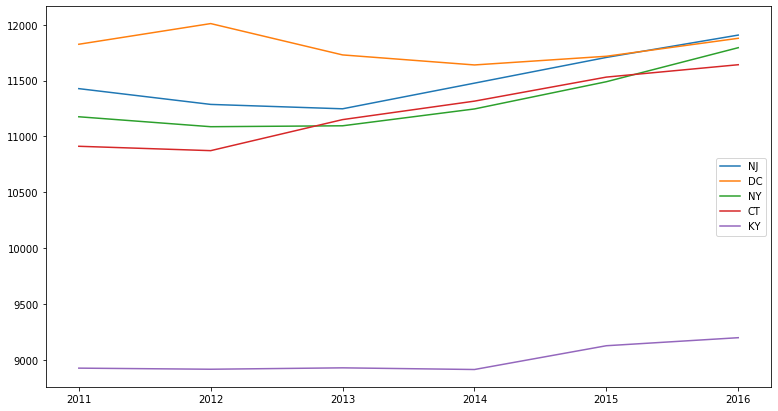

In [6]:
plt.figure(figsize=(13,7))
plt.plot(eastern_states_cost)
plt.legend(eastern_states_cost.columns)
plt.show()

In [7]:
#Group by state
broken_down = obese_data_df.groupby('State')
#broken_down.count()


In [8]:
#Western-most states
#Better layout for the dataFrame. Easier to plot. 
nj_group_2 = pd.DataFrame(broken_down.get_group("NJ"))
nj_group_2.sort_values(by=['Year'],inplace=True)
nj_group_2.rename(columns={'Percent Adults':'NJ'},inplace=True)

dc_group_2 = pd.DataFrame(broken_down.get_group("DC"))
dc_group_2.sort_values(by=['Year'],inplace=True)
dc_group_2.rename(columns={'Percent Adults':'DC'},inplace=True)

ny_group_2 = pd.DataFrame(broken_down.get_group("NY"))
ny_group_2.sort_values(by=['Year'],inplace=True)
ny_group_2.rename(columns={'Percent Adults':'NY'},inplace=True)

ct_group_2 = pd.DataFrame(broken_down.get_group("CT"))
ct_group_2.sort_values(by=['Year'],inplace=True)
ct_group_2.rename(columns={'Percent Adults':'CT'},inplace=True)

ky_group_2 = pd.DataFrame(broken_down.get_group("KY"))
ky_group_2.sort_values(by=['Year'],inplace=True)
ky_group_2.rename(columns={'Percent Adults':'KY'},inplace=True)

merged = nj_group_2.merge(dc_group_2,on='Year')
merged = merged.merge(ny_group_2,on='Year')
merged = merged.merge(ct_group_2,on='Year')
merged = merged.merge(ky_group_2,on='Year')
merged_eastern = merged.loc[:,["NJ","DC","NY","CT","KY","Year"]]
merged_eastern.set_index('Year',inplace=True)
merged_eastern #use this DF for graphing

,NJ,DC,NY,CT,KY
Year,,,,,
2011,25.0,26.3,25.9,23.7,25.1
2012,27.2,19.1,25.7,26.5,29.2
2013,26.2,23.8,25.9,26.3,29.7
2014,27.3,23.7,27.3,27.2,27.5
2015,26.9,29.7,24.9,25.5,31.2
2016,28.0,24.0,24.6,24.9,31.0


In [9]:
#Western-most states
#Better layout for the dataFrame. Easier to plot. 
ne_group_2 = pd.DataFrame(broken_down.get_group("NE"))
ne_group_2.sort_values(by=['Year'],inplace=True)
ne_group_2.rename(columns={'Percent Adults':'NE'},inplace=True)

id_group_2 = pd.DataFrame(broken_down.get_group("ID"))
id_group_2.sort_values(by=['Year'],inplace=True)
id_group_2.rename(columns={'Percent Adults':'ID'},inplace=True)

nm_group_2 = pd.DataFrame(broken_down.get_group("NM"))
nm_group_2.sort_values(by=['Year'],inplace=True)
nm_group_2.rename(columns={'Percent Adults':'NM'},inplace=True)

mt_group_2 = pd.DataFrame(broken_down.get_group("MT"))
mt_group_2.sort_values(by=['Year'],inplace=True)
mt_group_2.rename(columns={'Percent Adults':'MT'},inplace=True)

hi_group_2 = pd.DataFrame(broken_down.get_group("HI"))
hi_group_2.sort_values(by=['Year'],inplace=True)
hi_group_2.rename(columns={'Percent Adults':'HI'},inplace=True)

merged_w = ne_group_2.merge(id_group_2,on='Year')
merged_w = merged_w.merge(nm_group_2,on='Year')
merged_w = merged_w.merge(mt_group_2,on='Year')
merged_w = merged_w.merge(hi_group_2,on='Year')
merged_western = merged_w.loc[:,["NE","ID","NM","MT","HI","Year"]]
merged_western.set_index('Year',inplace=True)
merged_western #Use this DF for plotting


,NE,ID,NM,MT,HI
Year,,,,,
2011,27.2,24.3,19.9,21.9,16.9
2012,26.8,26.9,20.4,22.3,14.1
2013,28.2,29.9,20.5,23.4,16.1
2014,28.6,26.2,20.8,26.7,14.1
2015,32.0,27.3,22.3,23.2,17.9
2016,29.9,25.2,24.0,24.3,16.0


In [25]:
#----Deprecated: Used better method for creating tabular DataFrame above

##get individual state groups & convert to DataFrame
## Eastern-most states
# nj_group = pd.DataFrame(broken_down.get_group("NJ"))
# dc_group = pd.DataFrame(broken_down.get_group("DC"))
# ny_group = pd.DataFrame(broken_down.get_group("NY"))
# ct_group = pd.DataFrame(broken_down.get_group("CT"))
# ky_group = pd.DataFrame(broken_down.get_group("KY"))

## Western-most states:
# ne_group = pd.DataFrame(broken_down.get_group("NE"))
# id_group = pd.DataFrame(broken_down.get_group("ID"))
# nm_group = pd.DataFrame(broken_down.get_group("NM"))
# mt_group = pd.DataFrame(broken_down.get_group("MT"))
# hi_group = pd.DataFrame(broken_down.get_group("HI"))


In [26]:
#----Deprecated: Used better method for creating tabular DataFrame above

##sort values
##East
# nj_group.sort_values(by=["Year"], inplace=True)
# dc_group.sort_values(by=["Year"], inplace=True)
# ny_group.sort_values(by=["Year"], inplace=True)
# ct_group.sort_values(by=["Year"], inplace=True)
# ky_group.sort_values(by=["Year"], inplace=True)

##West
# ne_group.sort_values(by=["Year"], inplace=True)
# id_group.sort_values(by=["Year"], inplace=True)
# nm_group.sort_values(by=["Year"], inplace=True)
# mt_group.sort_values(by=["Year"], inplace=True)
# hi_group.sort_values(by=["Year"], inplace=True)

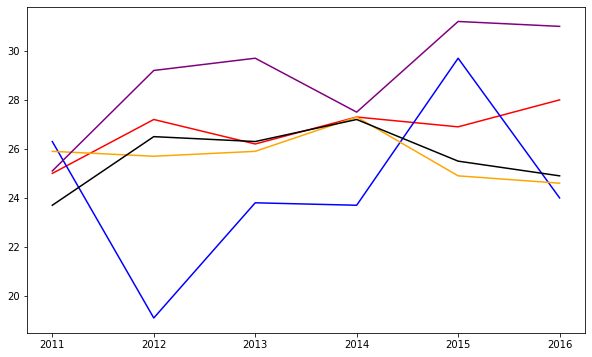

In [28]:
# ----Deprecated: Used better method for creating tabular DataFrame above

#Example plot for percentage of obese adults >65
# plt.figure(figsize=(10,6))
# plt.plot(nj_group["Year"],nj_group["Percent Adults"], color="red")
# plt.plot(dc_group["Year"],dc_group["Percent Adults"], color="blue")
# plt.plot(ny_group["Year"],ny_group["Percent Adults"], color="orange")
# plt.plot(ct_group["Year"],ct_group["Percent Adults"], color="black")
# plt.plot(ky_group["Year"],ky_group["Percent Adults"], color="purple")


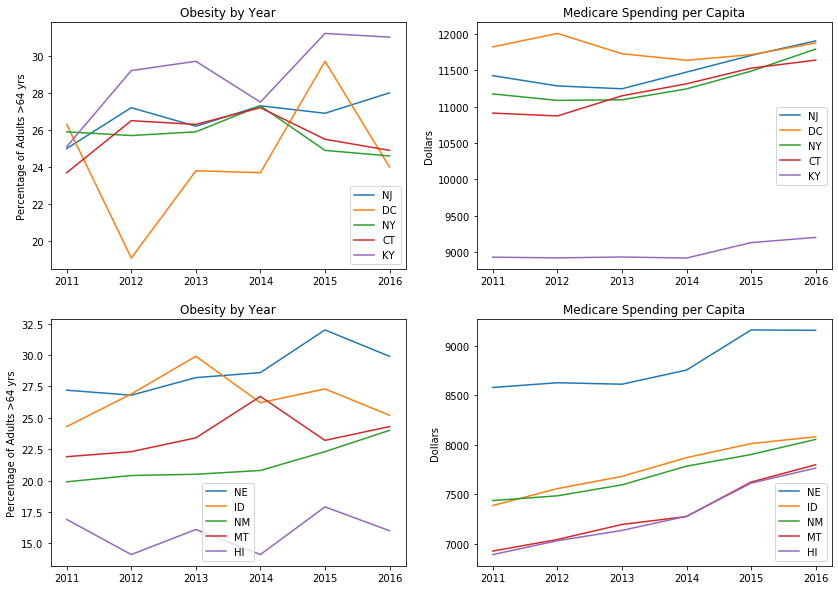

In [10]:
#setup figure
fig1 = plt.figure(figsize = (14,10))
axes1 = fig1.add_subplot(2,2,1)
axes2 = fig1.add_subplot(2,2,2)
axes3 = fig1.add_subplot(2,2,3)
axes4 = fig1.add_subplot(2,2,4)

#plotting for first axes (box 1)
axes1.plot(merged_eastern)
axes1.legend(merged_eastern.columns)
axes1.set_ylabel("Percentage of Adults >64 yrs")
axes1.set_title("Obesity by Year")

#plotting for second axes (box 2)
axes2.plot(eastern_states_cost)
axes2.legend(eastern_states_cost.columns)
axes2.set_ylabel("Dollars")
axes2.set_title("Medicare Spending per Capita")
#plt.show()

#plotting for third axes (box 3)
axes3.plot(merged_western)
axes3.legend(merged_western.columns)
axes3.set_ylabel("Percentage of Adults >64 yrs")
axes3.set_title("Obesity by Year")

#plotting for fourth axes (box 4)
axes4.plot(western_states_cost)
axes4.legend(western_states_cost.columns)
axes4.set_ylabel("Dollars")
axes4.set_title("Medicare Spending per Capita")

fig1.savefig('Images/Obesity_vs_costpercap.png')
